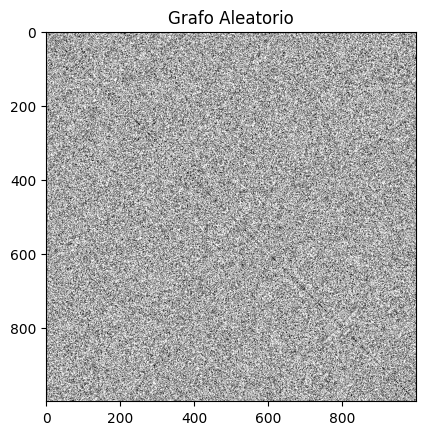

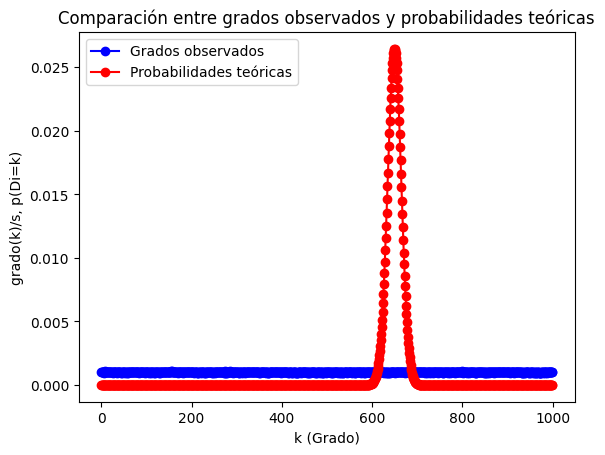

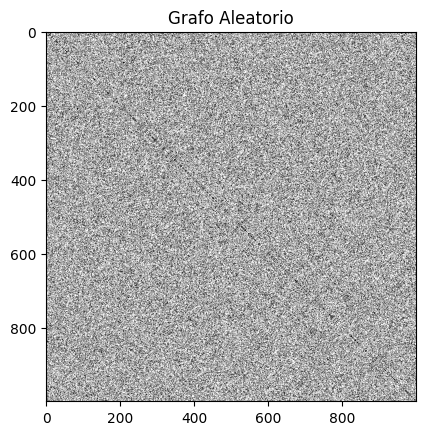

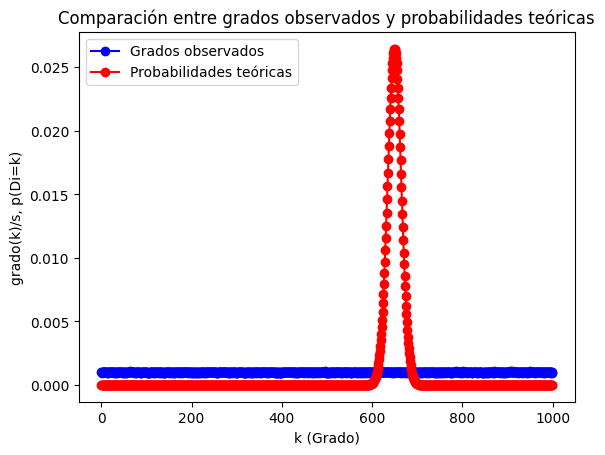

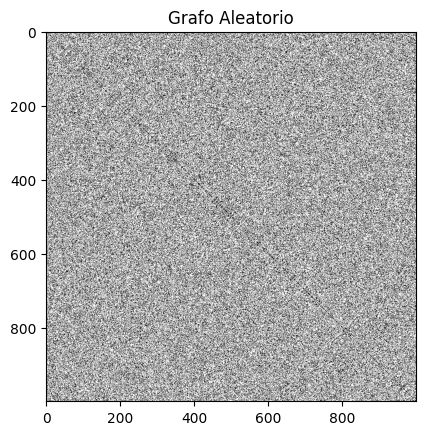

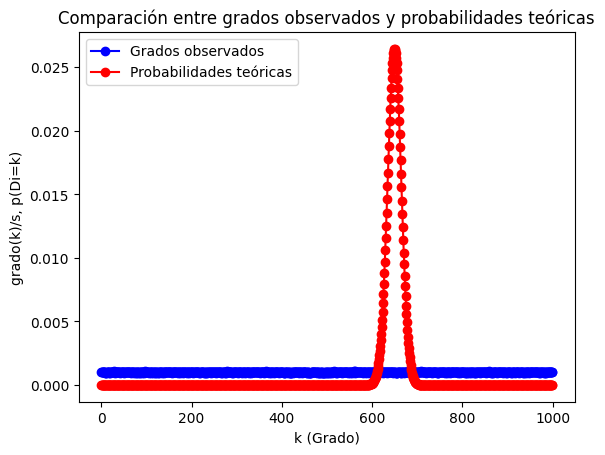

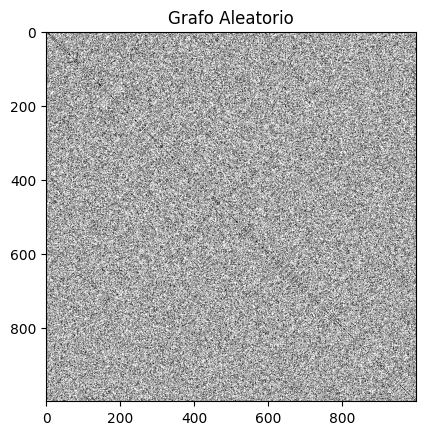

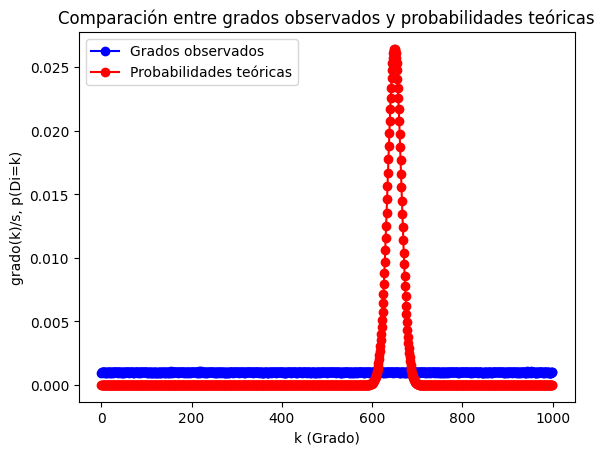

Promedio general de grados: 649.2729999999999


In [42]:
import matplotlib.pyplot as plt
import math
import numpy as np

def generar_grafo_aleatorio(n, p):
    grafo = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1, n):
            if np.random.rand() < p:
                grafo[i][j] = 1
                grafo[j][i] = 1
    return grafo

def contar_grados(grafo):
    grados = np.sum(grafo, axis=1)
    return grados

def promedio_grados(grados):
    return np.mean(grados)

def graficar_grados(grados):
    s = np.sum(grados)
    k = np.arange(len(grados))
    plt.plot(k, grados/s, 'bo-', label='Grados observados')
    plt.xlabel('k (Grado)')
    plt.ylabel('grado(k)/s')
    plt.title('Distribución de los grados')
    plt.legend()
    plt.show()

def calcular_probabilidad(n, p, k):
    coeficiente = math.comb(n-1, k)
    probabilidad = coeficiente * (p**k) * ((1-p)**(n-k-1))
    return probabilidad

def graficar_probabilidades(n, p):
    k = np.arange(n)
    probabilidades = [calcular_probabilidad(n, p, k) for k in range(n)]
    plt.plot(k, probabilidades, 'ro-', label='Probabilidades teóricas')
    plt.xlabel('k (Grado)')
    plt.ylabel('p(Di=k)')
    plt.title('Distribución teórica de los grados')
    plt.legend()
    plt.show()

def graficar_grados_vs_probabilidades(grados, n, p):
    s = np.sum(grados)
    k = np.arange(len(grados))
    probabilidades = [calcular_probabilidad(n, p, k) for k in range(len(grados))]
    plt.plot(k, grados/s, 'bo-', label='Grados observados')
    plt.plot(k, probabilidades, 'ro-', label='Probabilidades teóricas')
    plt.xlabel('k (Grado)')
    plt.ylabel('grado(k)/s, p(Di=k)')
    plt.title('Comparación entre grados observados y probabilidades teóricas')
    plt.legend()
    plt.show()

# (a) Generar múltiples grafos aleatorios binomiales G(n=1000, p=0.65)
n = 1000
p = 0.65
num_grafos = 4  # Número de grafos aleatorios a generar

grados_promedio = []
for _ in range(num_grafos):
    grafo = generar_grafo_aleatorio(n, p)

    # (b) Contar cuántas veces aparece cada grado
    grados = contar_grados(grafo)
    grados_promedio.append(promedio_grados(grados))

    # (c) Graficar p(Di=k)
    plt.imshow(grafo, cmap='gray', origin='upper')
    plt.title('Grafo Aleatorio')
    plt.show()

    # (d) Graficar grados observados y probabilidades teóricas
    graficar_grados_vs_probabilidades(grados, n, p)

# (e) Promedio de grados
promedio_general = np.mean(grados_promedio)
print("Promedio general de grados:", promedio_general)
